# Import Library

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [2]:
path_dir = './output'
train = './output/train'
test = './output/test'
val = './output/validation'

## Preprocessing

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)


In [16]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(150, 300),
    batch_size=4,
    shuffle=True,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val,
    target_size=(150, 300),
    batch_size=2,
    shuffle=True,
    class_mode='categorical'
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test,
    target_size=(150, 300),
    batch_size=2,
    shuffle=True,
    class_mode='categorical'
)

Found 12431 images belonging to 2 classes.
Found 3729 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


## Visualization


In [5]:
train_generator.class_indices

{'non-vehicles': 0, 'vehicles': 1}

In [6]:
x_train,y_train = train_generator.next()
print(x_train.shape,y_train.shape)

(4, 150, 300, 3) (4, 2)


In [ ]:
plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(np.argmax(y_train[i]))

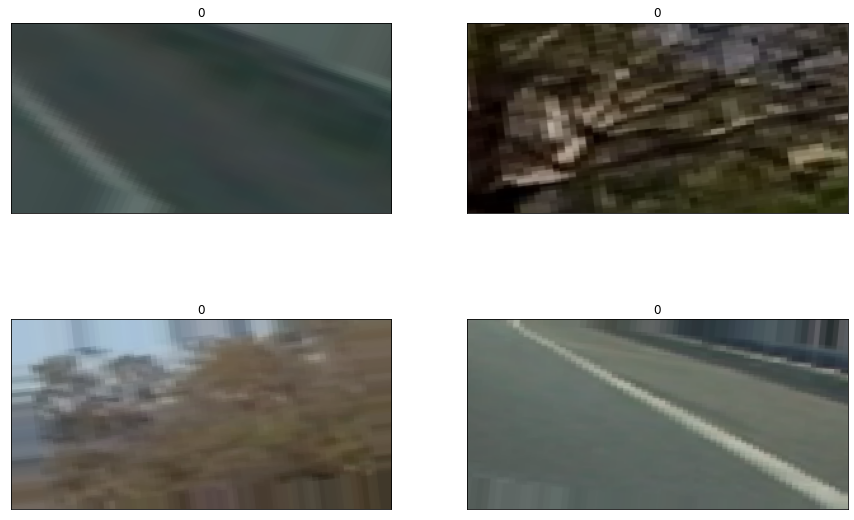

In [7]:
plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(np.argmax(y_train[i]))

## Modelling

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=[150, 300, 3]),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 99, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 77616)             0         
                                                                 
 dense (Dense)               (None, 32)                2483744   
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,484,258
Trainable params: 2,484,258
Non-trainable params: 0
______________________________________________

In [10]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Evaluasi

In [11]:
hasil = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
3108/3108 [==============================] - 664s 213ms/step - loss: 0.4881 - accuracy: 0.7826 - val_loss: 0.3162 - val_accuracy: 0.8992
Epoch 2/10
3108/3108 [==============================] - 257s 83ms/step - loss: 0.2946 - accuracy: 0.8999 - val_loss: 0.1897 - val_accuracy: 0.9394
Epoch 3/10
3108/3108 [==============================] - 255s 82ms/step - loss: 0.1927 - accuracy: 0.9345 - val_loss: 0.1615 - val_accuracy: 0.9472
Epoch 4/10
3108/3108 [==============================] - 261s 84ms/step - loss: 0.1627 - accuracy: 0.9470 - val_loss: 0.1052 - val_accuracy: 0.9729
Epoch 5/10
3108/3108 [==============================] - 268s 86ms/step - loss: 0.1485 - accuracy: 0.9525 - val_loss: 0.1155 - val_accuracy: 0.9654
Epoch 6/10
3108/3108 [==============================] - 260s 84ms/step - loss: 0.1383 - accuracy: 0.9553 - val_loss: 0.0929 - val_accuracy: 0.9772
Epoch 7/10
3108/3108 [==============================] - 254s 82ms/step - loss: 0.1331 - accuracy: 0.9579 - val_loss: 

Text(0.5, 1.0, 'loss')

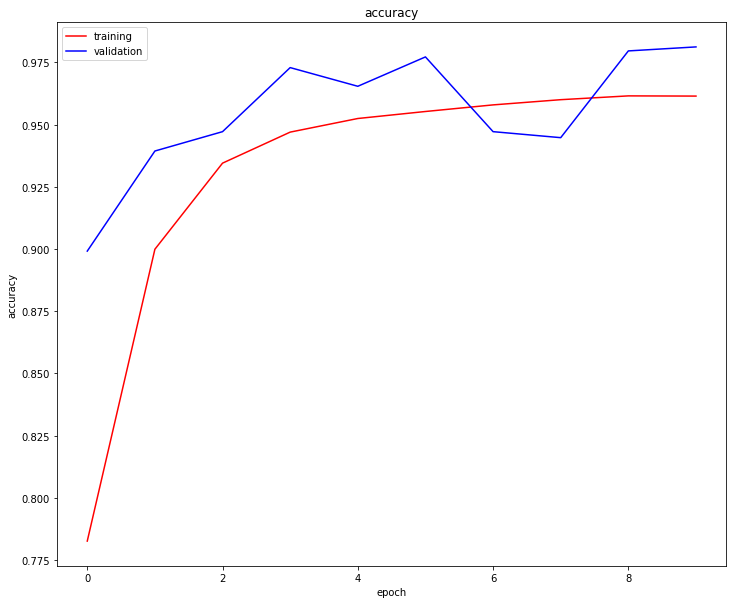

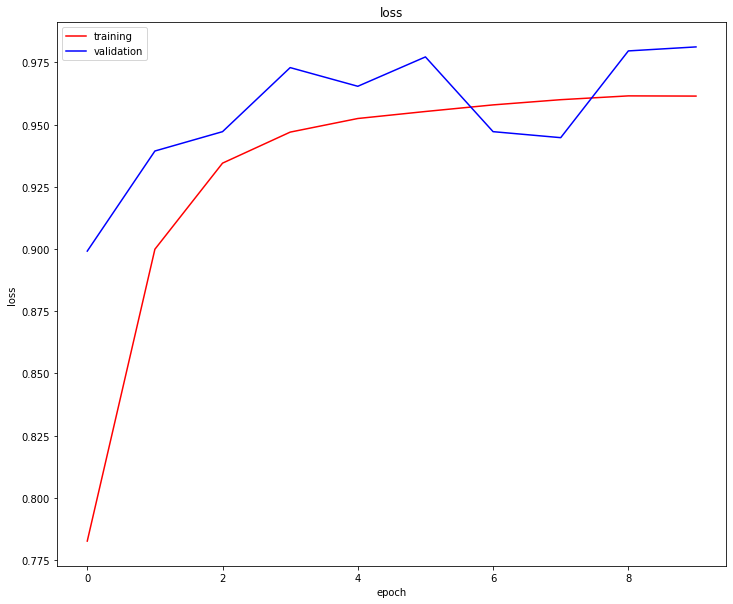

In [12]:
accuracy_train = hasil.history['accuracy']
val_accuracy_train = hasil.history['val_accuracy']
loss_train =  hasil.history['loss']
val_loss = hasil.history['val_loss']
x = range(len(accuracy_train))

plt.figure(1, figsize=(12,8))
plt.plot(x, accuracy_train, c='r', label='training')
plt.plot(x, val_accuracy_train, c='b', label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy')
         
plt.figure(2, figsize=(12,8))
plt.plot(x, accuracy_train, c='r', label='training')
plt.plot(x, val_accuracy_train, c='b', label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss')

In [19]:
predict = model.predict(test_generator)


801/801 [==============================] - 189s 229ms/step


NameError: name 'classification_report' is not defined

In [32]:
val_label=np.array(val)
print(classification_report(predict, predict, target_names = ['Vehicle (Class 0)','Non vehicle (Class 1)']))

ValueError: continuous-multioutput is not supported